Penalties called in previous 200 games.

In [1]:
import PbPMethods2 as pm2
from pylab import *
%matplotlib inline
import seaborn
import pandas as pd
window = 200

Generate data

In [2]:
penalties = {}
for season in range(2007, 2017):
    for team in pm2.get_teams(season):
        for line in pm2.read_team_pbp(team, season, types=['PENL'], strengths=['all']):
            g = pm2.get_game(line)
            game = '{0:d}{1:d}'.format(season, g)
            if game not in penalties:
                penalties[game] = 0
            penalties[game] += 1
    print('Done with', season)
penalties2 = [val/2 for key, val in penalties.items()]
seasons = [int(key[:4]) for key in penalties]
games = [int(key[4:]) for key in penalties]

Done with 2007
Done with 2008
Done with 2009
Done with 2010
Done with 2011
Done with 2012
Done with 2013
Done with 2014
Done with 2015
Done with 2016


Calculate rolling numbers

In [3]:
rolling = pd.DataFrame({'Season': seasons, 'Game': games, 'Penalties': penalties2})
rolling.sort_values(by=['Season', 'Game'], inplace=True)
rolling['{0:d}-game Avg'.format(window)] = pd.rolling_mean(rolling.Penalties, window=window)
rolling['GameNum'] = rolling.groupby('Season')['Game'].rank()
rolling['Playoff'] = rolling['Game'].apply(lambda x: x > 30000)
rolling.head()

,Game,Penalties,Season,200-game Avg,GameNum,Playoff
6781,20001,18,2007,NaN,1,False
8852,20002,12,2007,NaN,2,False
4066,20003,16,2007,NaN,3,False
776,20004,18,2007,NaN,4,False
8631,20005,15,2007,NaN,5,False


Plot

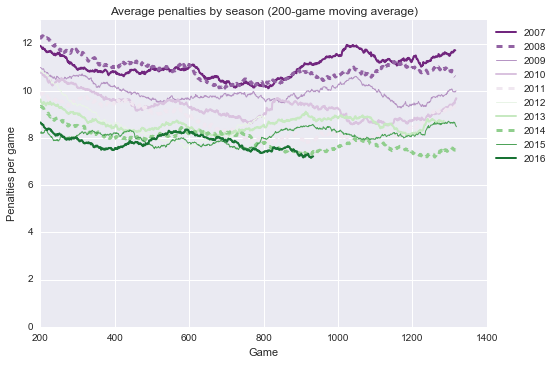

In [4]:
seaborn.set_palette("PRGn", 10)
seasons = sorted(rolling.Season.value_counts().index)
for season in seasons:
    linestyle = {0: '-', 1: '--', 2: '-'}[season % 3]
    linewidth = (season + 1) % 3 + 1
    temp = rolling[(rolling.Season == season) & (rolling.GameNum >= 200)]
    plot(temp['GameNum'], 
         temp['{0:d}-game Avg'.format(window)], 
         label=season, ls=linestyle, lw=linewidth)
legend(loc=2, bbox_to_anchor=(1, 1))
xlabel('Game')
ylabel('Penalties per game')
ylim(bottom=0)
title('Average penalties by season ({0:d}-game moving average)'.format(window))